<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Text-Mining-%26-Natural-Language-Processing/HW3_WorldCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW3 WorldCloud Endangered Animals** - Matthew Tello

In [ ]:
#start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Eanimals.csv to Eanimals (1).csv


In [ ]:
#Load in the dataframe
df = pd.read_csv("Eanimals.csv", index_col=0) 

In [ ]:
#Looking at first 5 rows of the dataset
df.head()

,CommonName,Species Group,Federal Listing Status,Where Listed
Scientific Name,,,,
Acanthorutilus handlirschi,Cicek (minnow),Fishes,Endangered,Wherever found
Accipiter fasciatus natalis,Christmas Island goshawk,Birds,Endangered,Wherever found
Accipiter francesii pusillus,Anjouan Island sparrowhawk,Birds,Endangered,Wherever found
Accipiter gentilis laingi,Queen Charlotte goshawk,Birds,Threatened,"British Columbia, Canada"
Accipiter striatus venator,Puerto Rican sharp-shinned hawk,Birds,Endangered,Wherever found


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} endangered animals in this dataset such as {}... \n".format(len(df.CommonName.unique()), 
                                                                           ", ".join(df.CommonName.unique()[0:5])))

print("There are {} endangered animals in this dataset such as {}... \n".format(len(df.CommonName.unique()), 
                                                                                      ", ".join(df.CommonName.unique()[0:5])))

There are 1488 observations and 4 features in this dataset. 

There are 1310 endangered animals in this dataset such as Cicek (minnow), Christmas Island goshawk, Anjouan Island sparrowhawk, Queen Charlotte goshawk, Puerto Rican sharp-shinned hawk... 

There are 1310 endangered animals in this dataset such as Cicek (minnow), Christmas Island goshawk, Anjouan Island sparrowhawk, Queen Charlotte goshawk, Puerto Rican sharp-shinned hawk... 



In [ ]:
df[["CommonName", "Federal Listing Status", "Species Group"]].head()

,CommonName,Federal Listing Status,Species Group
Scientific Name,,,
Acanthorutilus handlirschi,Cicek (minnow),Endangered,Fishes
Accipiter fasciatus natalis,Christmas Island goshawk,Endangered,Birds
Accipiter francesii pusillus,Anjouan Island sparrowhawk,Endangered,Birds
Accipiter gentilis laingi,Queen Charlotte goshawk,Threatened,Birds
Accipiter striatus venator,Puerto Rican sharp-shinned hawk,Endangered,Birds


In [ ]:
#Groupby by Animal Name
CommonName = df.groupby("CommonName")

#Summary statistic of all Endangered Animals
CommonName.describe().head()

Species Group                        \
                              count unique       top freq   
CommonName                                                  
Abbott's booby                    1      1     Birds    1   
Acklins ground iguana             1      1  Reptiles    1   
Addax                             1      1   Mammals    1   
Adriatic sturgeon                 1      1    Fishes    1   
African coelacanth                1      1    Fishes    1   

                      Federal Listing Status                          \
                                       count unique         top freq   
CommonName                                                             
Abbott's booby                             1      1  Endangered    1   
Acklins ground iguana                      1      1  Threatened    1   
Addax                                      1      1  Endangered    1   
Adriatic sturgeon                          1      1  Endangered    1   
African coelacanth                         1      1  Threatened    1   

                      Where Listed         \
                             count unique   
CommonName                                  
Abbott's booby                   1      1   
Acklins ground iguana            1      1   
Addax                            1      1   
Adriatic sturgeon                1      1   
African coelacanth               1      1   

                                                                               
                                                                     top freq  
CommonName                                                                     
Abbott's booby                                            Wherever found    1  
Acklins ground iguana                                     Wherever found    1  
Addax                                                     Wherever found    1  
Adriatic sturgeon                                         Wherever found    1  
African coelacanth     Tanzanian Distinct Population  Segment (DPS) o...    1

In [ ]:
CommonName.mean().sort_values(by="CommonName", ascending=False).head()

""
CommonName
yelloweye rockfish
yellow-eyed penguin
white-flippered penguin
southern rockhopper penguin
noonday snail


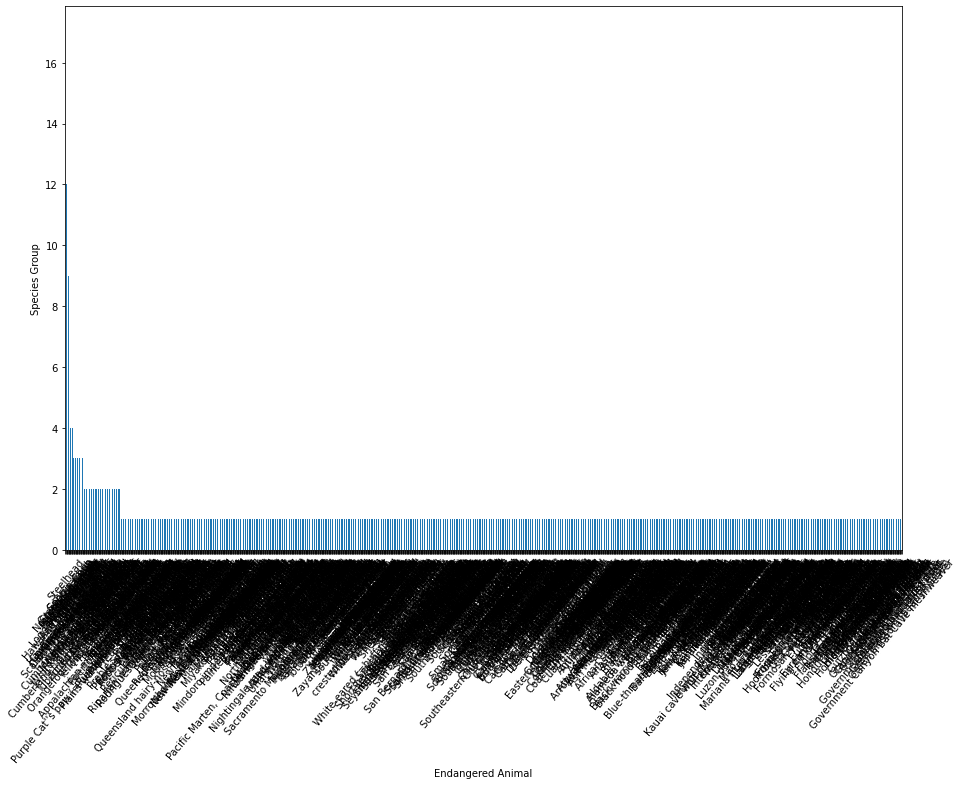

In [ ]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Endangered Animal")
plt.ylabel("Species Group")
plt.show()

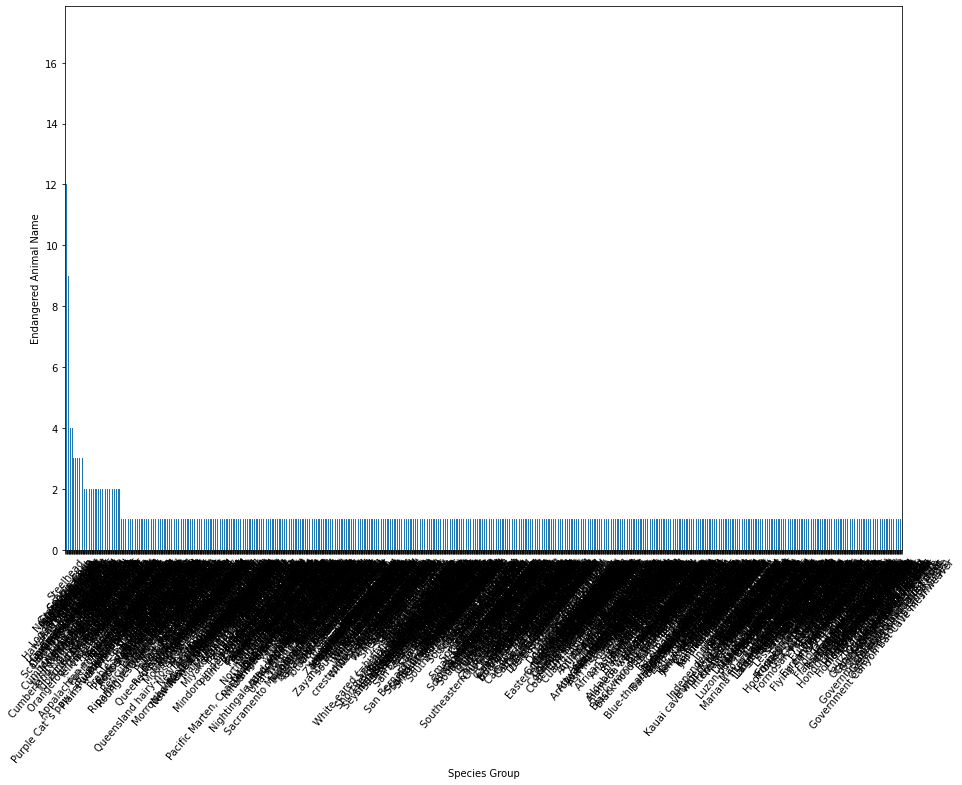

In [ ]:
plt.figure(figsize=(15,10))
CommonName.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Species Group")
plt.ylabel("Endangered Animal Name")
plt.show()

TypeError: ignored

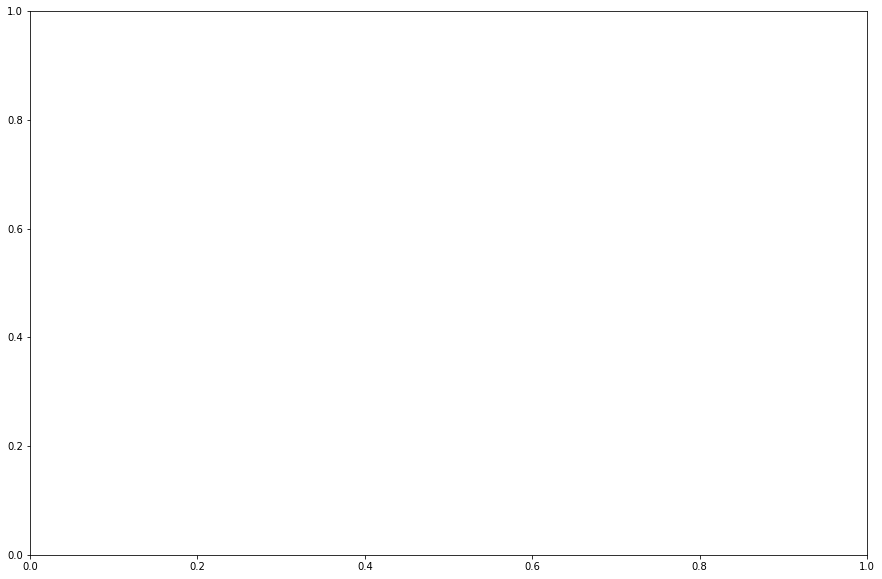

In [ ]:
plt.figure(figsize=(15,10))
CommonName["CommonName"].max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Endangered Animal Name")
plt.ylabel("Species Type")
plt.show()

In [ ]:
# ?WordCloud


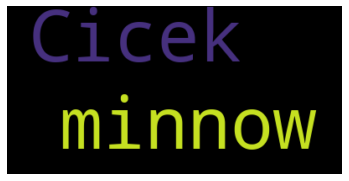

In [ ]:
# Start with one review:
text = df.CommonName[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

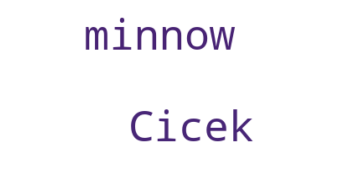

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the graphics/img folder:
wordcloud.to_file("sample_data/first_review.png")

In [ ]:
text = " ".join(review for review in df.CommonName)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29848 words in the combination of all review.


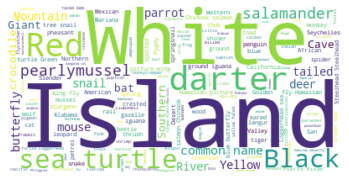

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 204384_turtle_endangered_sea turtle_icon.png to 204384_turtle_endangered_sea turtle_icon.png


In [ ]:
turtle_mask = np.array(Image.open("204384_turtle_endangered_sea turtle_icon.png").convert('L'))
turtle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_turtle_mask = np.zeros_like(turtle_mask)
for i in range(turtle_mask.shape[0]):
    for j in range(turtle_mask.shape[1]):
        transformed_turtle_mask[i, j] = transform_format(turtle_mask[i, j])

In [ ]:
# Check the expected result of your mask
transformed_turtle_mask 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

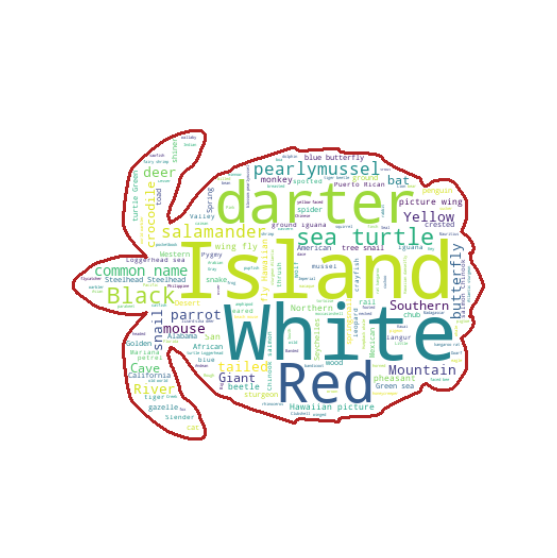

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_turtle_mask, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# New Section